In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
from sqlalchemy import create_engine
from ast import literal_eval
import json

%matplotlib inline
# plt.style.use('fivethirtyeight')

Importing plotly failed. Interactive plots will not work.


In [2]:
# Postgres username, password, and database name
POSTGRES_ADDRESS = 'localhost'

POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'vegas'
POSTGRES_PASSWORD = 'VrichCrich99'
POSTGRES_DBNAME = 'univers-demo'

In [3]:
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME, password=POSTGRES_PASSWORD, ipaddress=POSTGRES_ADDRESS, port=POSTGRES_PORT, dbname=POSTGRES_DBNAME))
cnx = create_engine(postgres_str)

<h1 style="color: blue;">Get Sale Table For An AppstechLabUser</h1>

In [4]:
appstech_labs_id = 1
df = pd.read_sql_query(f"SELECT * FROM user_sales_table where appstech_labs_id='{appstech_labs_id}'", cnx, index_col='date', parse_dates=['date'])
df.head()

,id,appstech_labs_id,item_id,item_name,qty,unit_price,cost,net_amount,net_cost,currency,...,discount_amount,sub_total,margin,tax_inclusive_amount,sales_tax_rate,sales_tax_amount,gross_amount,customer_id,customer_name,refund_total_amount
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1,1,1547,Chewy Dipped Granola Bars (Chocolate Chip),10.0,0.23,0.21,2.30,2.10,XAF,...,0.09,2.21,0.11,2.30,0.0,0.0,2.21,2.0,Victoria Kelly,0.0
2019-01-01,2,1,1713,Pretzels Rods,2.0,0.15,0.13,0.30,0.26,USD,...,0.03,0.27,0.01,0.30,0.0,0.0,0.27,5.0,Daniel Thomas,0.0
2019-01-01,3,1,1227,Stir Fry Vegetables (Szechuan),5.0,0.14,0.12,0.70,0.60,USD,...,0.01,0.69,0.09,0.70,0.0,0.0,0.69,8.0,Javier Hall,0.0
2019-01-01,4,1,658,Shredded Cheese (Mexican Style),1.0,0.23,0.21,0.23,0.21,USD,...,0.01,0.22,0.01,0.23,0.0,0.0,0.22,3.0,Brandon Campbell,0.0
2019-01-01,5,1,1083,Mandarin Orange Chicken,10.0,0.20,0.18,2.00,1.80,AUD,...,0.08,1.92,0.12,2.00,0.0,0.0,1.92,5.0,Emily Byrd,0.0


In [5]:
df.shape

(23236, 21)

In [6]:
df.describe()

,appstech_labs_id,qty,unit_price,cost,net_amount,net_cost,discount_rate,discount_amount,sub_total,margin,tax_inclusive_amount,sales_tax_rate,sales_tax_amount,gross_amount,refund_total_amount
count,23236.0,23236.000000,23236.00000,23236.00000,23236.000000,23236.000000,23236.000000,23236.000000,23236.000000,23236.000000,23236.000000,23236.0,23236.0,23236.000000,23236.000000
mean,1.0,5.491350,0.63246,0.61246,3.454259,3.344432,5.001635,0.184332,3.269927,-0.074505,3.454259,0.0,0.0,3.059796,0.210140
std,0.0,2.866586,1.26904,1.26904,7.980219,7.967745,3.172075,0.495053,7.559982,0.487420,7.980219,0.0,0.0,7.691910,1.397753
min,1.0,1.000000,0.00000,-0.02000,0.000000,-0.200000,0.000000,0.000000,0.000000,-8.790000,0.000000,0.0,0.0,-42.140000,0.000000
25%,1.0,3.000000,0.12000,0.10000,0.480000,0.400000,2.000000,0.020000,0.460000,-0.020000,0.480000,0.0,0.0,0.400000,0.000000
50%,1.0,5.000000,0.23000,0.21000,1.170000,1.050000,5.000000,0.050000,1.100000,0.030000,1.170000,0.0,0.0,1.040000,0.000000
75%,1.0,8.000000,0.46000,0.44000,2.660000,2.520000,8.000000,0.140000,2.512500,0.080000,2.660000,0.0,0.0,2.430000,0.000000
max,1.0,10.000000,12.99000,12.97000,129.900000,129.700000,10.000000,8.990000,128.600000,0.200000,129.900000,0.0,0.0,128.520000,42.678900


In [7]:
df.isnull().sum()

id                      0
appstech_labs_id        0
item_id                 0
item_name               0
qty                     0
unit_price              0
cost                    0
net_amount              0
net_cost                0
currency                0
discount_rate           0
discount_amount         0
sub_total               0
margin                  0
tax_inclusive_amount    0
sales_tax_rate          0
sales_tax_amount        0
gross_amount            0
customer_id             0
customer_name           0
refund_total_amount     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23236 entries, 2019-01-01 to 2020-01-01
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    23236 non-null  object 
 1   appstech_labs_id      23236 non-null  int64  
 2   item_id               23236 non-null  object 
 3   item_name             23236 non-null  object 
 4   qty                   23236 non-null  float64
 5   unit_price            23236 non-null  float64
 6   cost                  23236 non-null  float64
 7   net_amount            23236 non-null  float64
 8   net_cost              23236 non-null  float64
 9   currency              23236 non-null  object 
 10  discount_rate         23236 non-null  float64
 11  discount_amount       23236 non-null  float64
 12  sub_total             23236 non-null  float64
 13  margin                23236 non-null  float64
 14  tax_inclusive_amount  23236 non-null  float64
 15  sa

In [9]:
numeric_feats = df.dtypes[df.dtypes != 'object'].index
numeric_feats = numeric_feats[1: ]
numeric_feats

Index(['qty', 'unit_price', 'cost', 'net_amount', 'net_cost', 'discount_rate',
       'discount_amount', 'sub_total', 'margin', 'tax_inclusive_amount',
       'sales_tax_rate', 'sales_tax_amount', 'gross_amount',
       'refund_total_amount'],
      dtype='object')

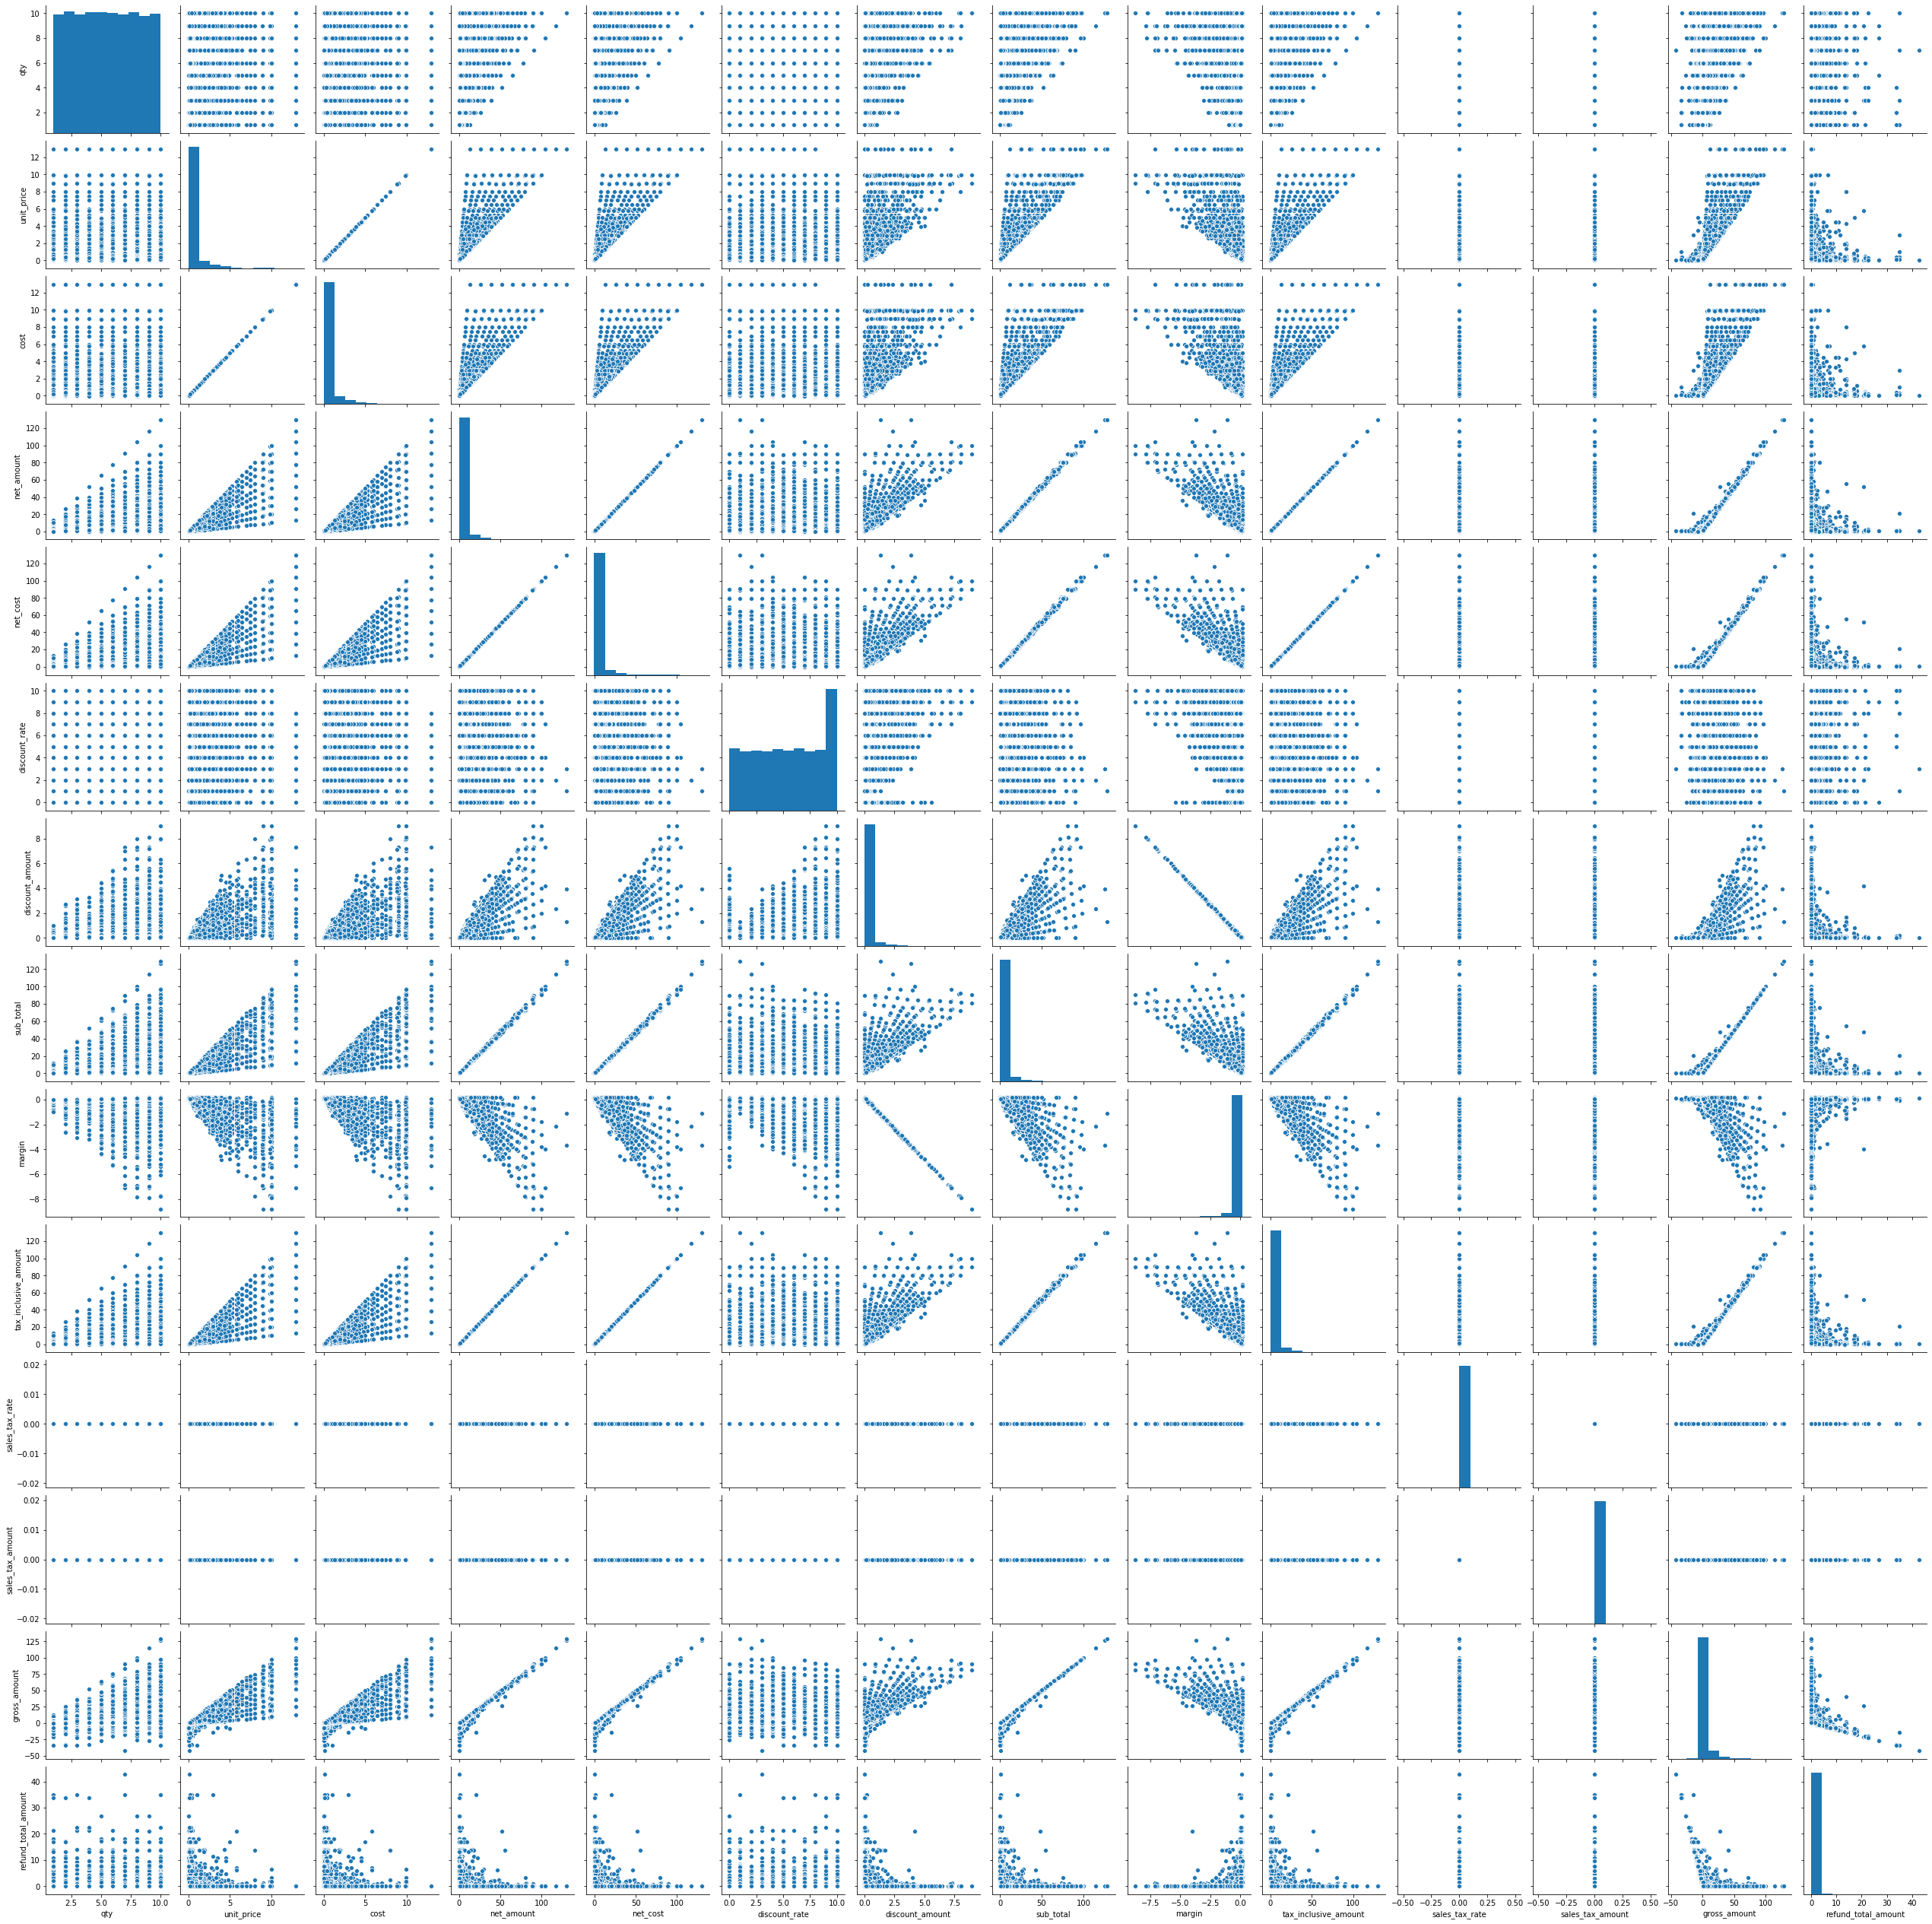

In [10]:
sns.pairplot(df[numeric_feats])
plt.show()

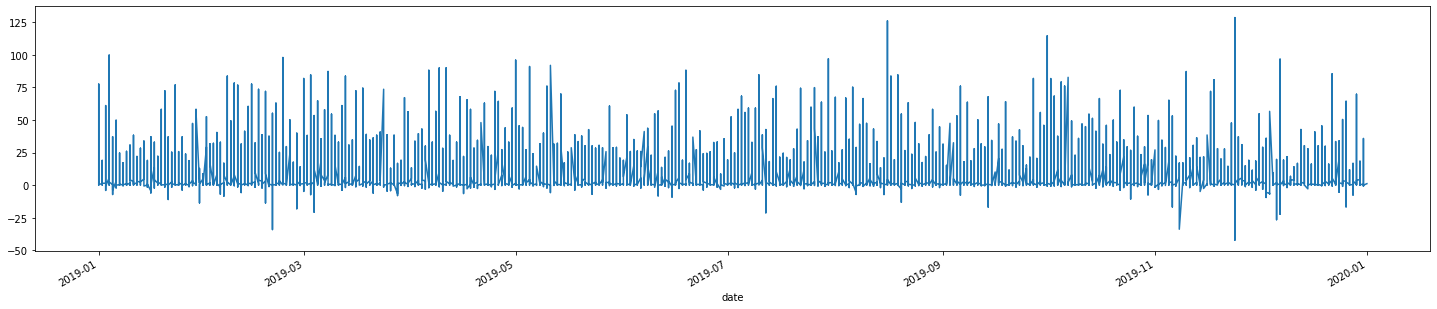

In [11]:
df['gross_amount'].plot(figsize=(25, 5))
plt.show()

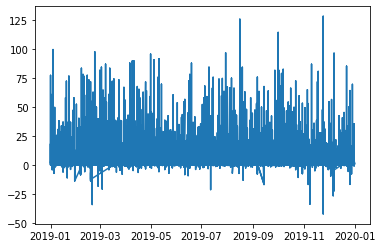

In [12]:
plt.plot(df.index, df.gross_amount)

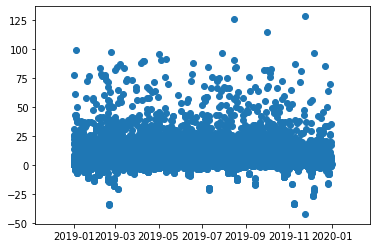

In [16]:
plt.scatter(df.index, df.gross_amount, )
plt.show()

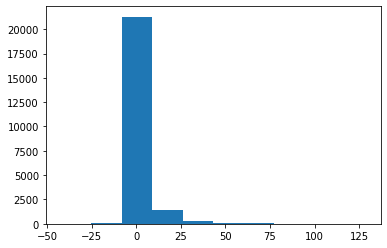

In [17]:
plt.hist(df.gross_amount)
plt.show()

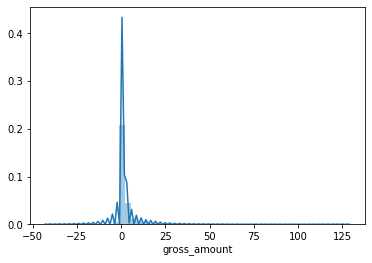

In [19]:
sns.distplot(df.gross_amount)
plt.show()

In [23]:
print(len(df[numeric_feats[0]]))
df[numeric_feats[0]].isnull().sum()

23236


0

In [25]:
int(len(df[numeric_feats[0]]) * 50 / 100)

11618